# Multi-Class Logistic Regression

Students often ask how to perform non binary classification with Logistic Regression. Fortunately, the process with scikit-learn is pretty much the same as with binary classification. To expand our understanding, we'll go through a simple data set, as well as seeing how to use LogisiticRegression with a manual GridSearchCV (instead of LogisticRegressionCV). 

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Data

We will work with the classic Iris Data Set. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Full Details: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
df = pd.read_csv('../DATA/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
g  = df.groupby('species')
for i in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    print(i ,g[i].mean())

sepal_length species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64
sepal_width species
setosa        3.418
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64
petal_length species
setosa        1.464
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64
petal_width species
setosa        0.244
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64


<AxesSubplot:xlabel='species', ylabel='count'>

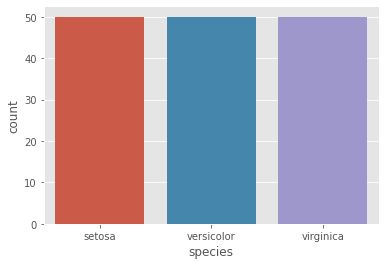

In [9]:
sns.countplot(x=df['species'])

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

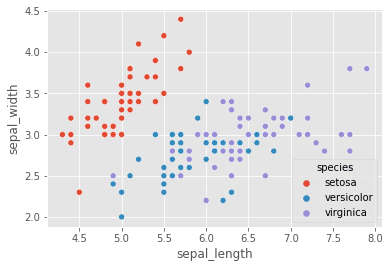

In [10]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

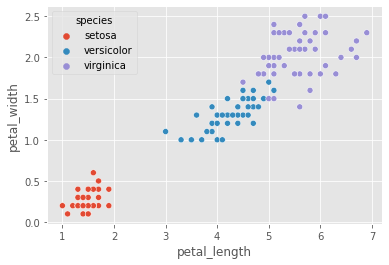

In [11]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

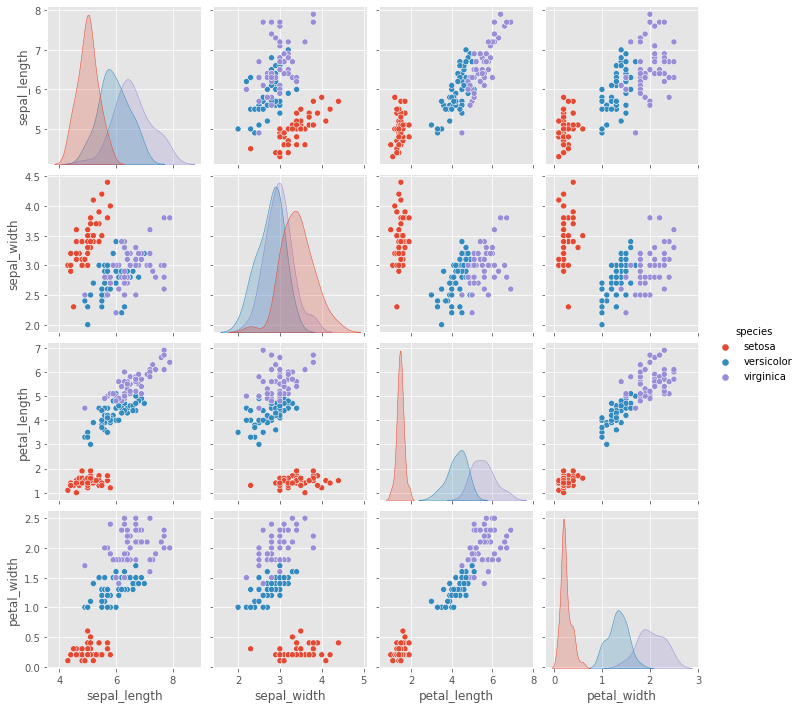

In [12]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

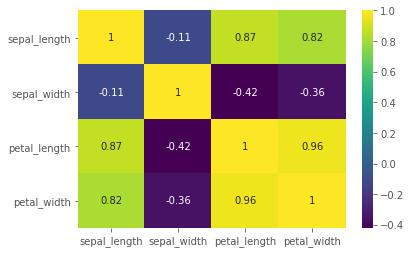

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

In [14]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

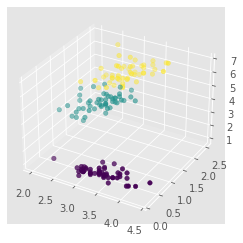

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

### Train | Test Split and Scaling

In [16]:
X = df.drop('species',axis=1)
y = df['species']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Multi-Class Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [24]:
# Penalty Type
penalty = ['elasticnet']
l1_ratio = np.linspace(0,1,20)
# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [25]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty,'l1_ratio':l1_ratio})

In [26]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['elasticnet']})

In [27]:
grid_model.best_params_

{'C': 7.742636826811269,
 'l1_ratio': 0.631578947368421,
 'penalty': 'elasticnet'}

### Model Performance on Classification Tasks

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [29]:
y_pred = grid_model.predict(scaled_X_test)

In [30]:
accuracy_score(y_test,y_pred)*100

97.36842105263158

In [31]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

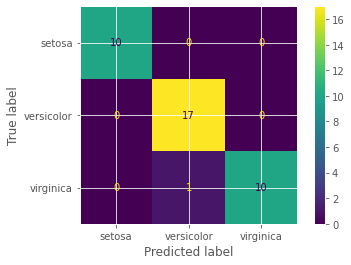

In [32]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## Evaluating Curves and AUC

**Make sure to watch the video on this! We need to manually create the plots for a Multi-Class situation. Fortunately, Scikit-learn's documentation already has plenty of examples on this.**

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

We have created a function for you that does this automatically, essentially creating and plotting an ROC per class.

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

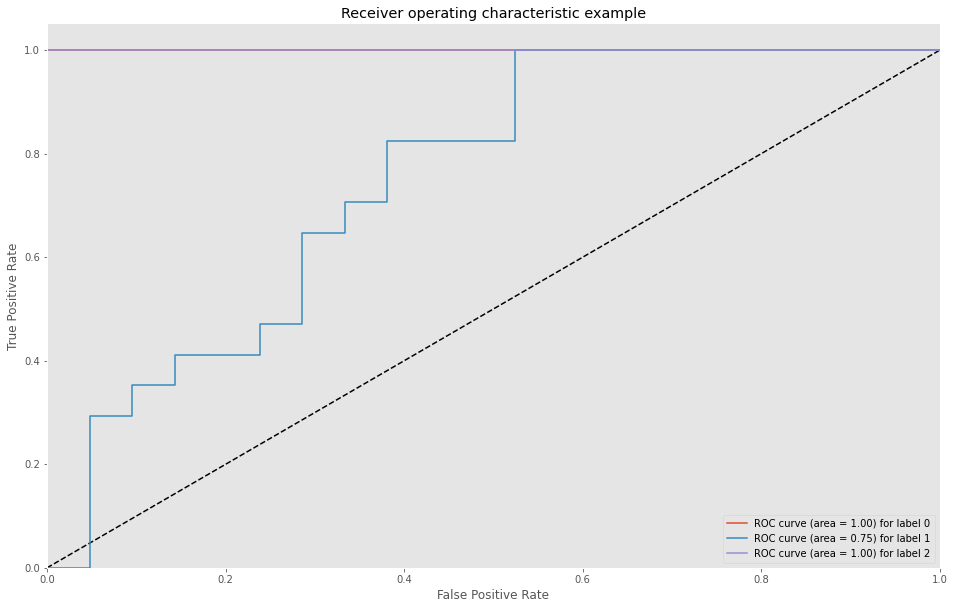

In [36]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

------
------